*****Context*****

Drinking quality water is essential for health and well-being.Water performs several vital functions in the human body, 
and consuming poor quality water can lead to serious health problems. Considering this, a classification model using a decision tree was built to predict whether water with certain presented parameters is safe or not for consumption.
The aim of this project is to predict the safety of drinking water based on various chemical properties.

*****Importing Libraries*****

In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt    
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

***Data Extraction***

In [6]:
df = pd.read_csv('water_Quality.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


***Data Explorartion***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [9]:
df['ammonia'].value_counts().sort_index()

ammonia
#NUM!    3
-0.01    4
-0.03    2
-0.07    2
-0.08    2
        ..
9.95     2
9.96     3
9.97     3
9.98     2
9.99     4
Name: count, Length: 2564, dtype: int64

In [10]:
df['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

The columns ammonia and is_safe are assigned with the wrong data type because some rows of them have invalid values. 
Let's see in which ones this occur.

***Data cleaning and converting***

In [13]:
df.query('ammonia == "#NUM!"')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [14]:
df.query('is_safe == "#NUM!"')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


The rows with invalid values are the same in both cases. Let's drop them.

In [16]:
df = df.drop(index=[7551, 7568, 7890], errors='ignore')

Converting the columns for right data type

In [18]:
df['ammonia'] = df['ammonia'].astype(float)    
df['is_safe'] = df['is_safe'].astype(int)

Ensure that the changes have been applied correctly.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [21]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


quick overview of the dataset's dimensions

In [23]:
df.shape

(7996, 21)

In [24]:
duplicates = df[df.duplicated()]
duplicates

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


In [25]:
a=df.columns
a

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

***Handling Missing Values***

Provides the count of missing values for each column

In [28]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

***Visualizing Data with Boxplots:***

See the spread and central tendency of the data.

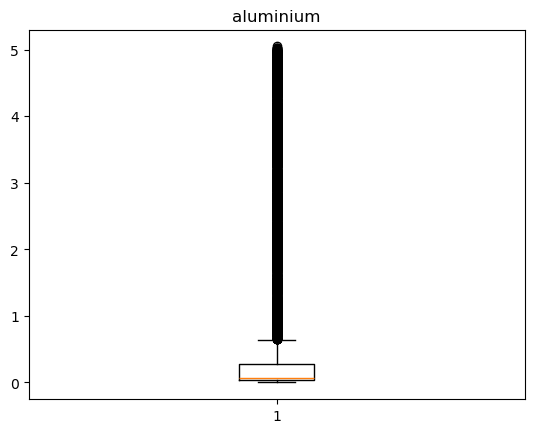

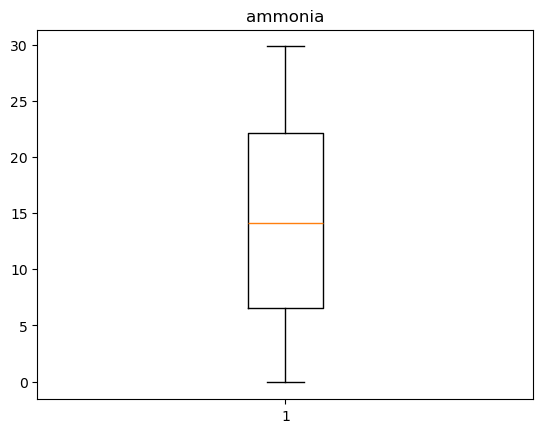

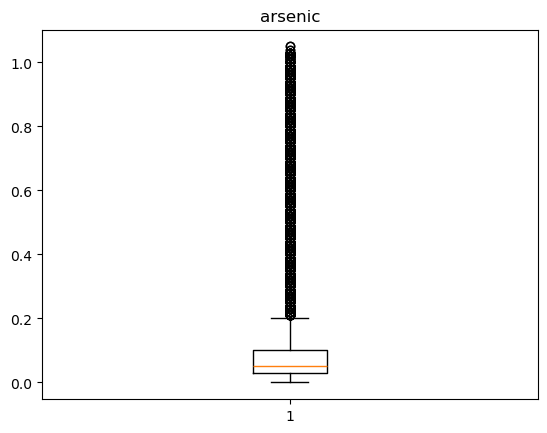

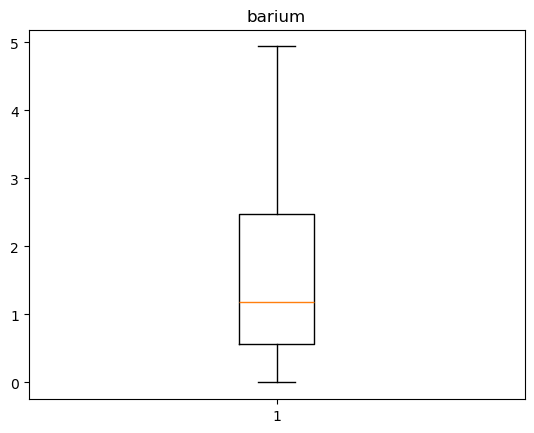

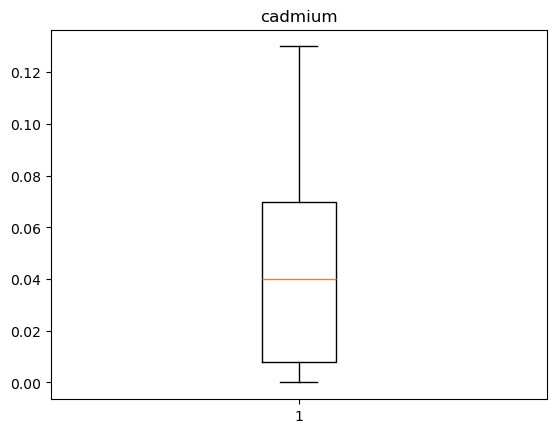

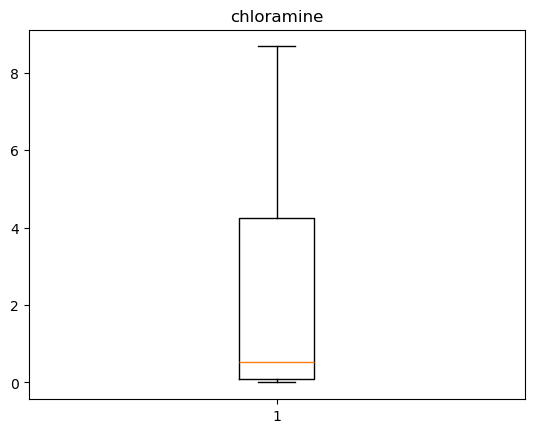

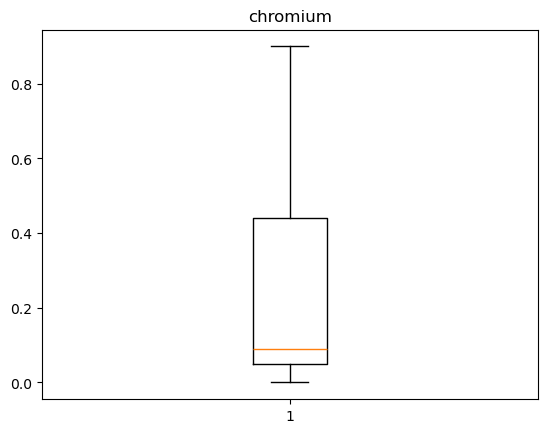

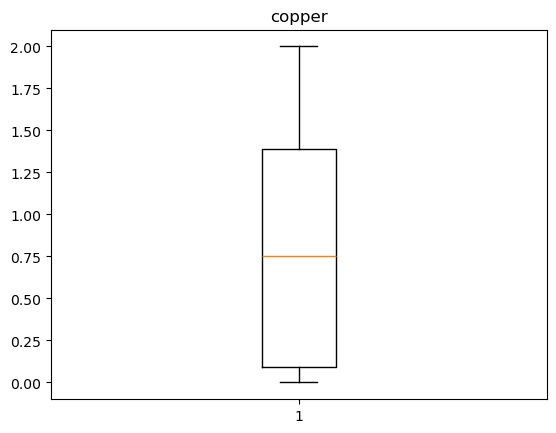

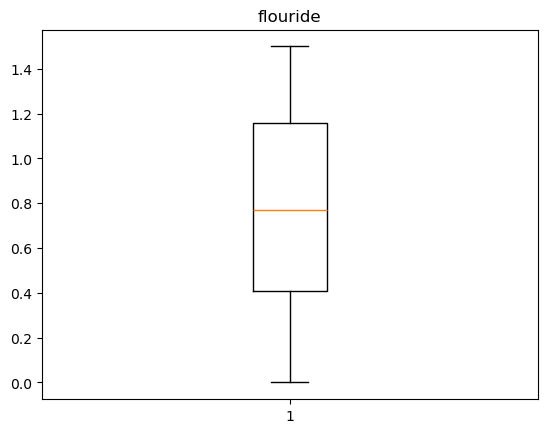

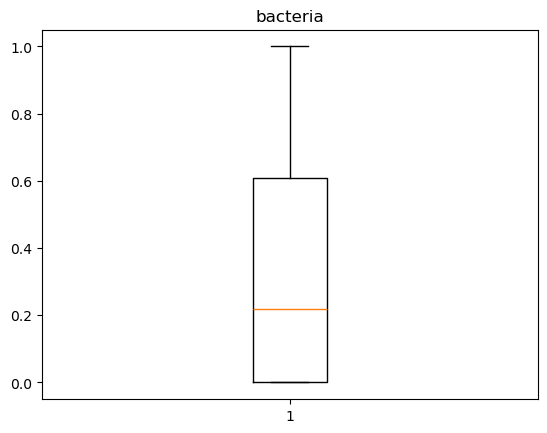

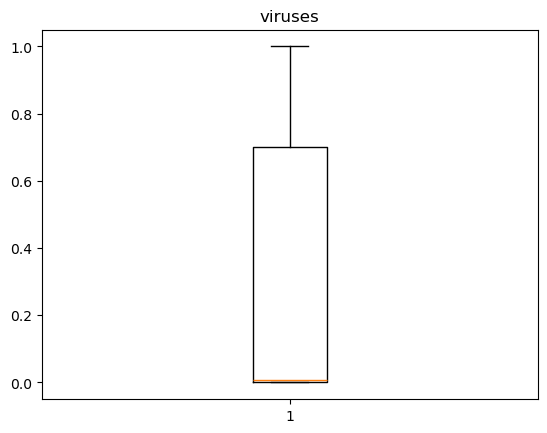

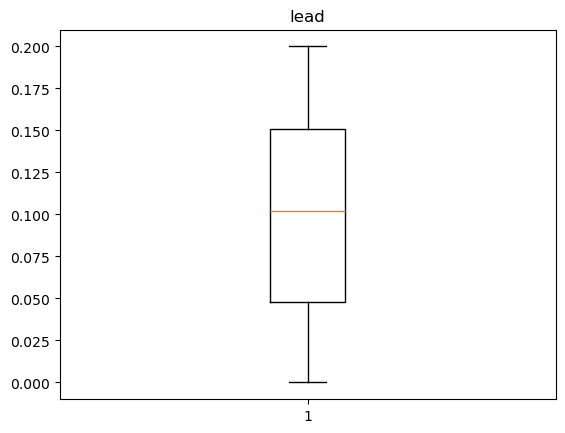

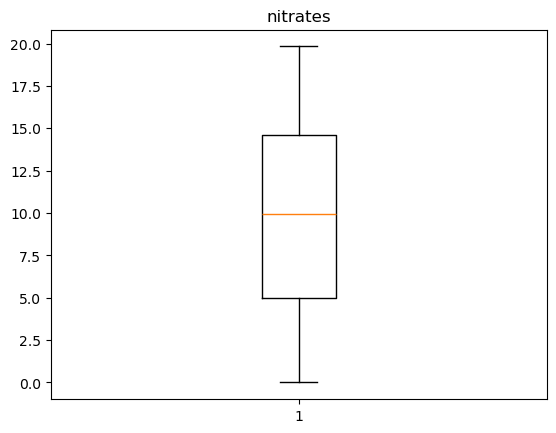

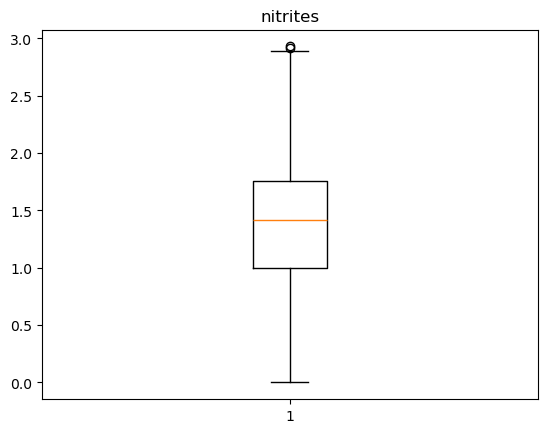

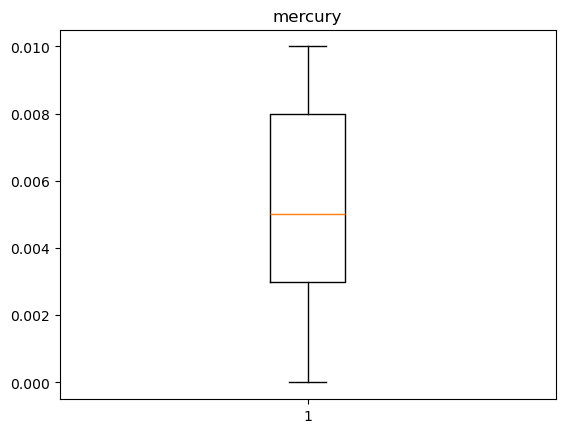

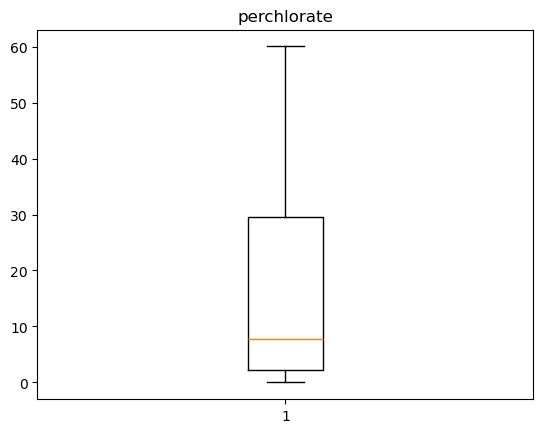

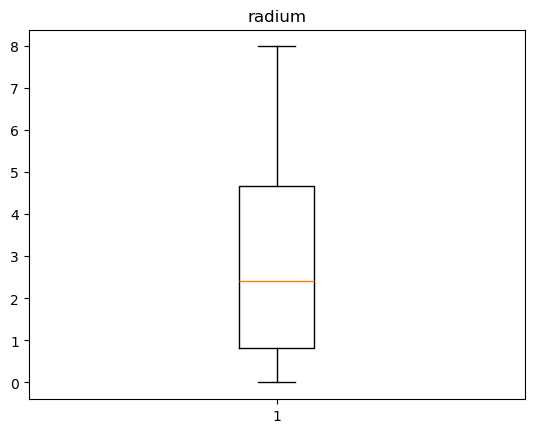

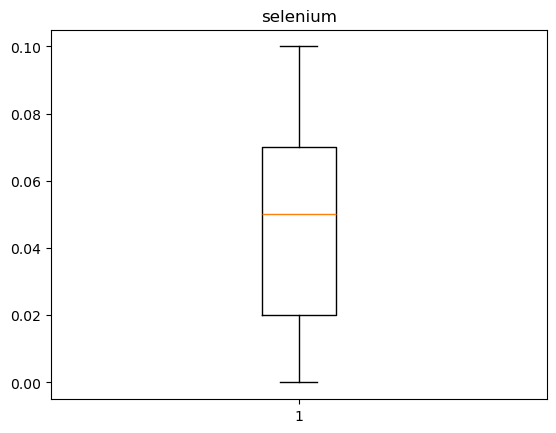

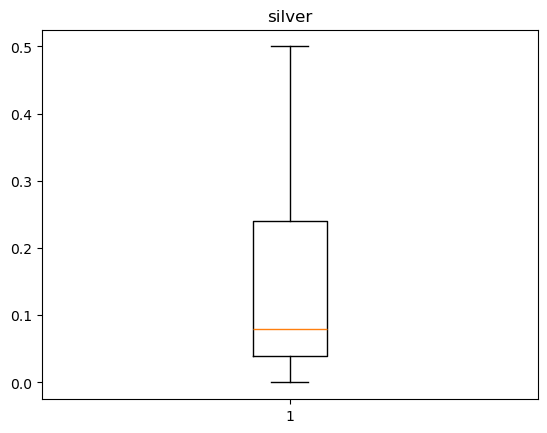

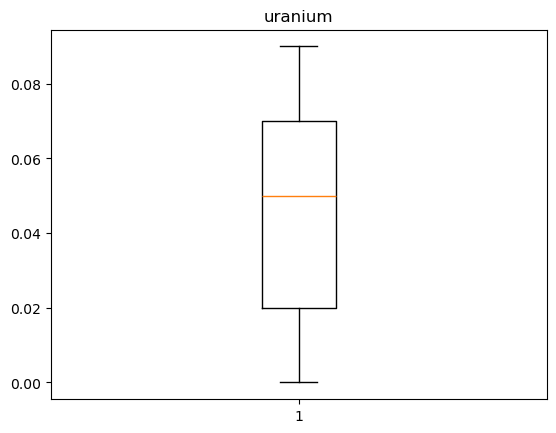

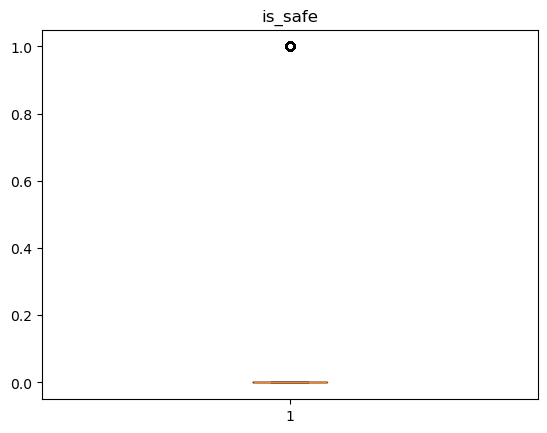

In [31]:
for i in a:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

***Outlier detection***

Detect values in the 'aluminium','arsenic' column that fall outside the calculated bounds, indicating potential outliers.

In [34]:
# aluminium

q1=df['aluminium'].quantile(0.25)
q3=df['aluminium'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 0.04
q3 0.28
iqr 0.24000000000000002
upper_tail 0.6400000000000001
lower_tail -0.32000000000000006


In [35]:
#df.loc[df['aluminium']>ub]

Managing extreme values without removing them entirely.

In [37]:
df.loc[df['aluminium']>ub,'aluminium']=ub

In [38]:
df.loc[df['aluminium']>ub]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


In [39]:
# arsenic

q1=df['arsenic'].quantile(0.25)
q3=df['arsenic'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 0.03
q3 0.1
iqr 0.07
upper_tail 0.20500000000000002
lower_tail -0.07500000000000001


In [40]:
#df.loc[df['arsenic']>ub]

In [41]:
df.loc[df['arsenic']>ub,'arsenic']=ub

In [42]:
df.loc[df['arsenic']>ub]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


In [43]:
# nitrites

q1=df['nitrites'].quantile(0.25)
q3=df['nitrites'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 1.0
q3 1.76
iqr 0.76
upper_tail 2.9000000000000004
lower_tail -0.14000000000000012


In [44]:
df.loc[df['nitrites']>ub]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
3293,0.03,0.95,0.205,3.28,0.11,1.95,0.04,0.14,0.77,0.24,...,0.062,13.92,2.92,0.005,24.91,0.99,0.08,0.49,0.08,0
7536,0.04,15.89,0.030,1.86,0.08,0.19,0.02,0.61,0.35,0.00,...,0.132,8.39,2.93,0.000,2.23,5.57,0.03,0.07,0.01,0


In [45]:
df.loc[df['nitrites']>ub,'nitrites']=ub

In [46]:
df.loc[df['nitrites']>ub]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


Ensure that the dataset is clean and ready for further analysis.

In [48]:
#for i in a:
    #plt.boxplot(x=df[i])
    #plt.title(i)
    #plt.show()

Understand the characteristics of  water samples.

In [50]:
df[df['is_safe'] == 1].describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.0
mean,0.472171,13.711096,0.045907,1.875888,0.017081,3.513355,0.384814,0.859671,0.779594,0.299441,...,0.097815,8.705680,1.404912,0.004888,20.198739,3.339211,0.047204,0.188947,0.039002,1.0
std,0.248715,8.634490,0.054629,1.203775,0.028027,2.448520,0.276194,0.627925,0.428040,0.319688,...,0.056840,5.593115,0.439214,0.003032,14.396278,2.287693,0.028504,0.153655,0.026744,0.0
min,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.220000,6.447500,0.020000,0.797500,0.003000,1.252500,0.110000,0.267500,0.430000,0.000000,...,0.048000,3.770000,1.167500,0.002000,7.675000,1.265000,0.020000,0.050000,0.020000,1.0
50%,0.640000,12.470000,0.030000,1.740000,0.006000,3.435000,0.360000,0.810000,0.785000,0.200000,...,0.101500,8.120000,1.450000,0.005000,18.160000,3.190000,0.050000,0.130000,0.030000,1.0
75%,0.640000,21.192500,0.040000,2.890000,0.009000,5.640000,0.620000,1.420000,1.142500,0.580000,...,0.147000,13.637500,1.730000,0.007000,30.587500,4.890000,0.070000,0.320000,0.060000,1.0
max,0.640000,29.800000,0.205000,4.530000,0.130000,8.660000,0.900000,1.990000,1.500000,1.000000,...,0.200000,19.750000,2.730000,0.010000,57.000000,7.930000,0.100000,0.500000,0.090000,1.0


In [51]:
df[df['is_safe'] == 0].describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,...,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.0
mean,0.163134,14.351222,0.082851,1.528281,0.046115,2.005621,0.229596,0.799023,0.770623,0.322324,...,0.099639,9.962612,1.320175,0.005232,15.984616,2.866150,0.050003,0.142516,0.045402,0.0
std,0.220234,8.907884,0.071755,1.212233,0.035633,2.531550,0.264824,0.656550,0.436384,0.330670,...,0.058338,5.519455,0.587624,0.002957,18.013894,2.321956,0.028794,0.141363,0.026842,0.0
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.030000,6.600000,0.030000,0.530000,0.010000,0.090000,0.040000,0.090000,0.400000,0.000000,...,0.048000,5.230000,0.960000,0.003000,1.920000,0.790000,0.030000,0.040000,0.020000,0.0
50%,0.070000,14.340000,0.060000,1.100000,0.040000,0.410000,0.080000,0.740000,0.760000,0.220000,...,0.102000,10.190000,1.410000,0.005000,6.785000,2.350000,0.050000,0.080000,0.050000,0.0
75%,0.110000,22.240000,0.100000,2.420000,0.080000,3.842500,0.400000,1.390000,1.160000,0.610000,...,0.151000,14.680000,1.770000,0.008000,29.167500,4.620000,0.070000,0.230000,0.070000,0.0
max,0.640000,29.840000,0.205000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.900000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,0.0


***Data Visualization***

To get a clear visual representation of the distribution of safe and unsafe water samples

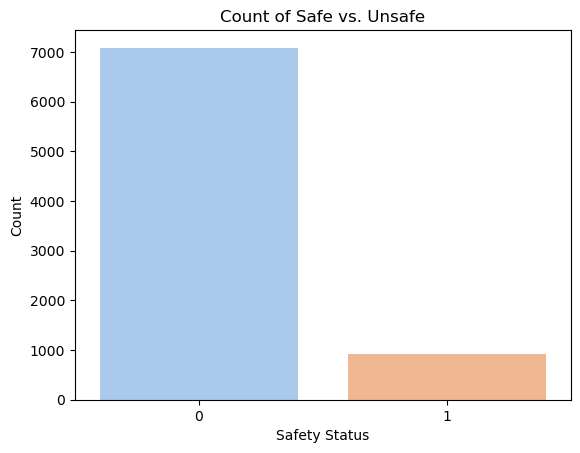

In [54]:
sns.countplot(data=df, x='is_safe', palette='pastel')  # Soft pastel colors
plt.title('Count of Safe vs. Unsafe')
plt.xlabel('Safety Status')
plt.ylabel('Count')
plt.show()

In [55]:
#sns.countplot(df,x='is_safe')

Notice that we have only 912 values for safe water and 7084 for unsafe water, let's see it in a percent way.

***Generate pie chart***

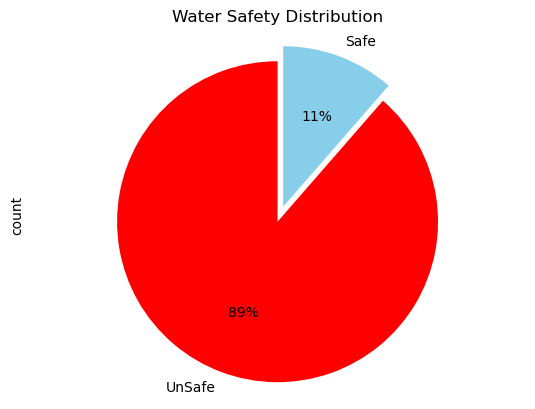

In [58]:
df['is_safe'].value_counts().plot.pie(explode=(0, 0.1),autopct="%.0f%%",   
                                      labels=['UnSafe', 'Safe'],colors=['red', 'skyblue'], startangle=90 )
plt.title('Water Safety Distribution')
plt.axis('equal')  
plt.show()

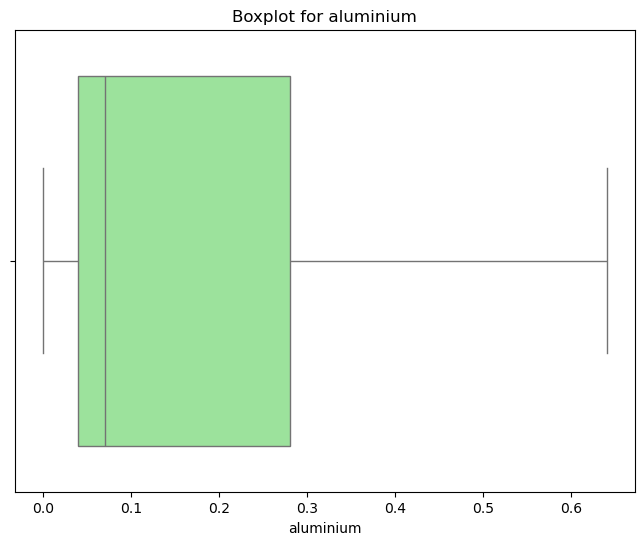

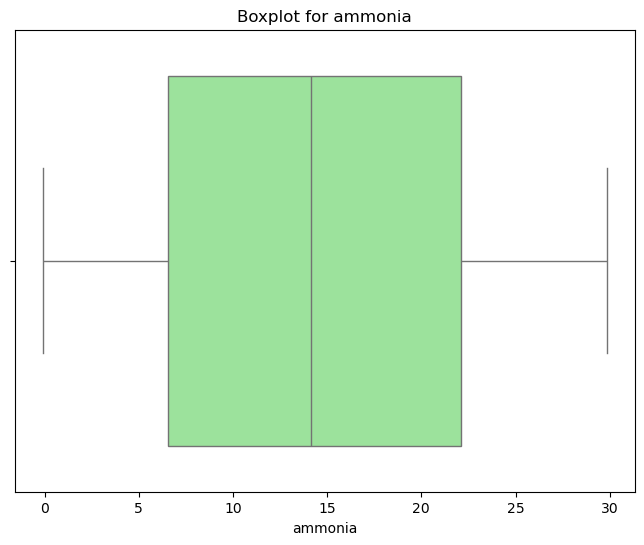

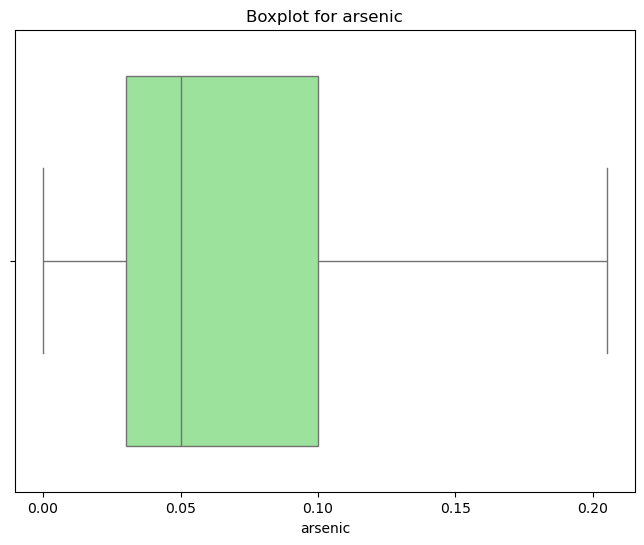

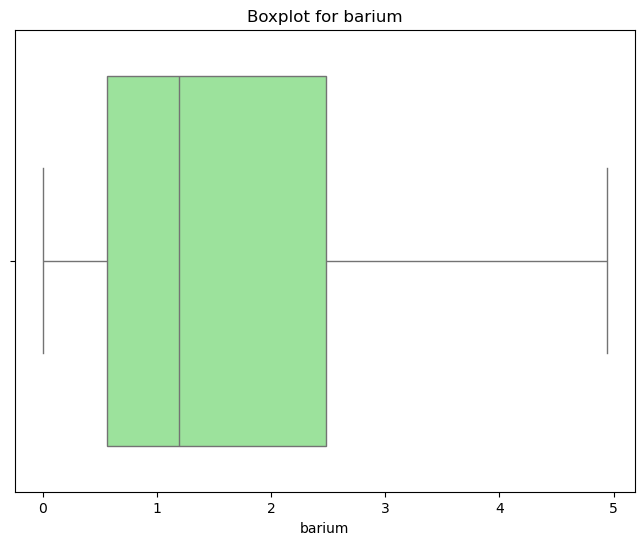

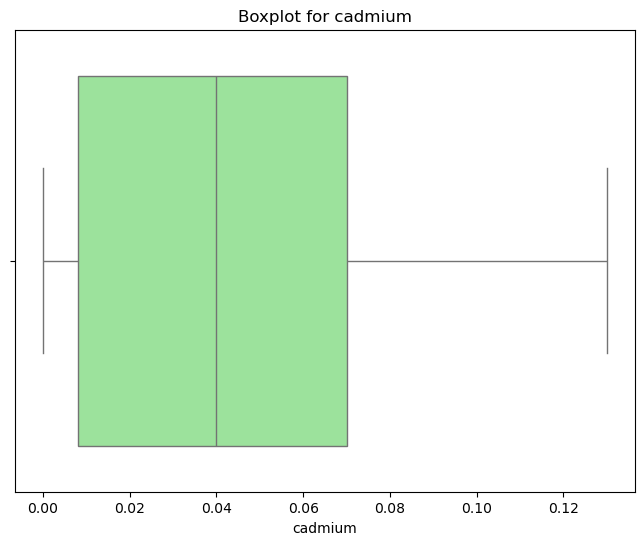

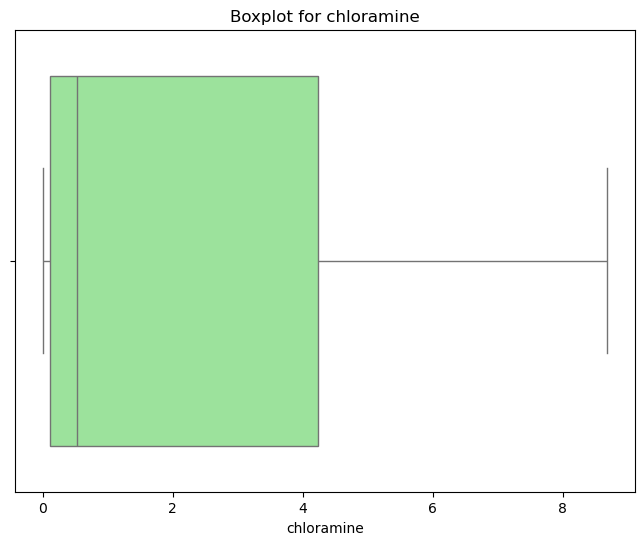

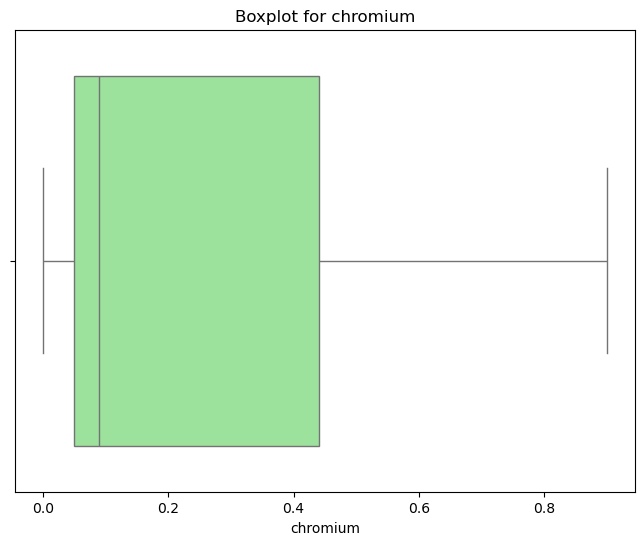

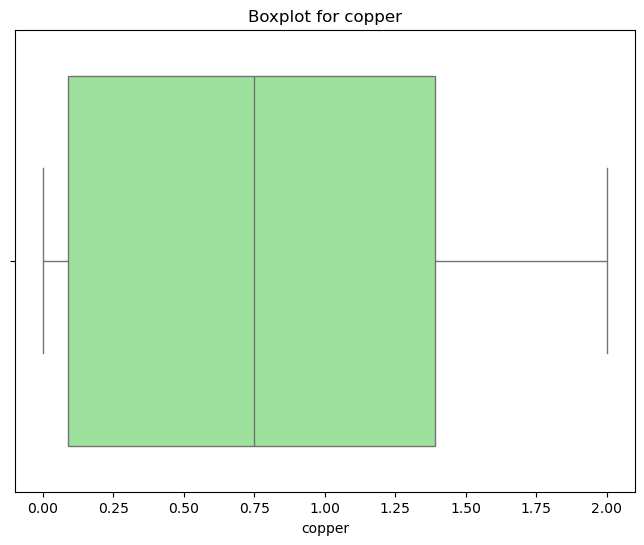

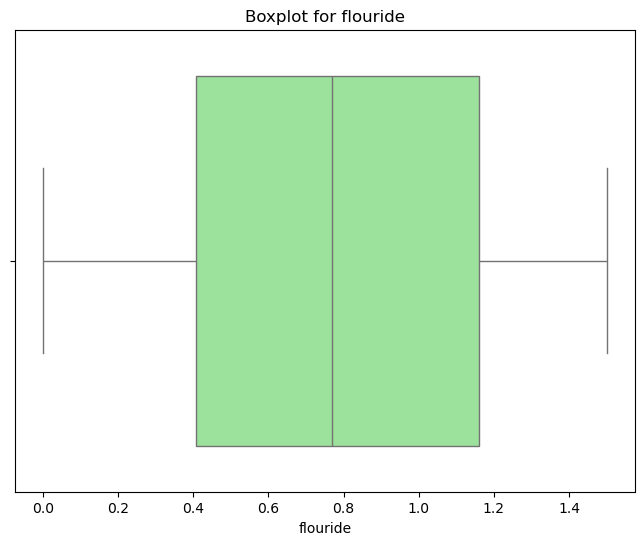

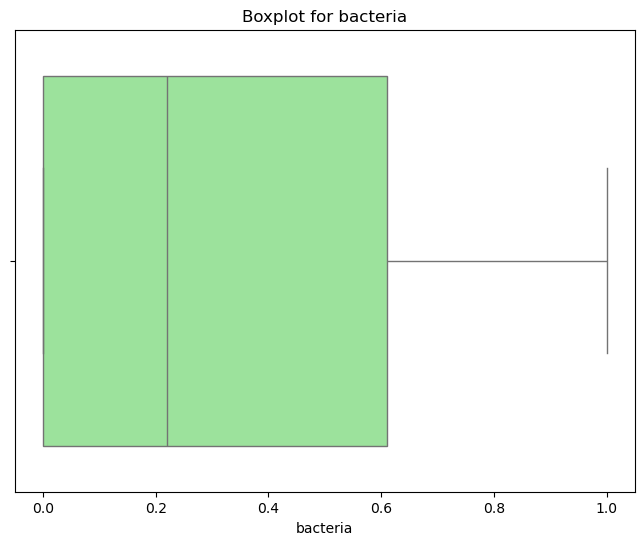

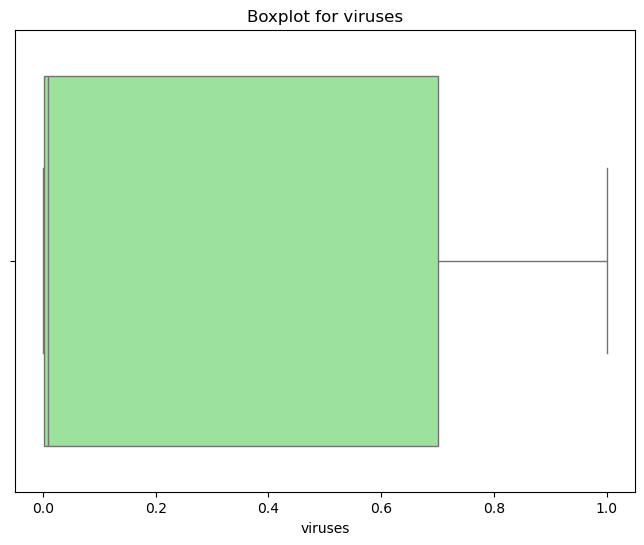

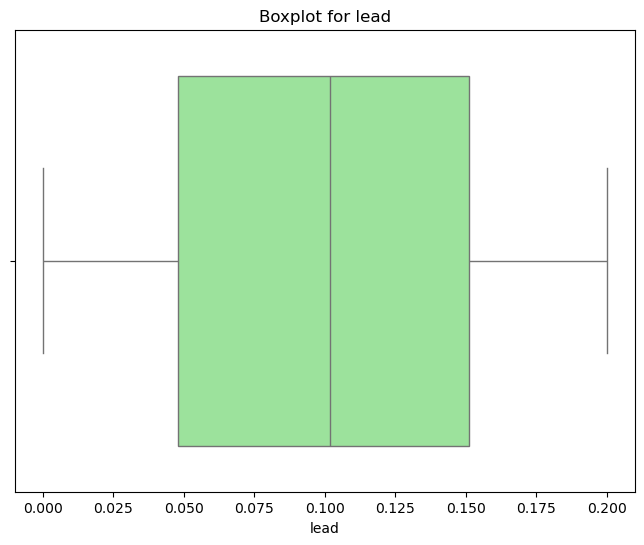

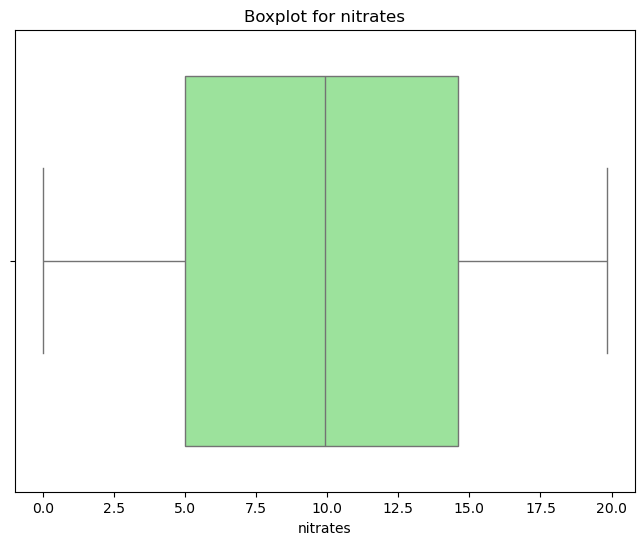

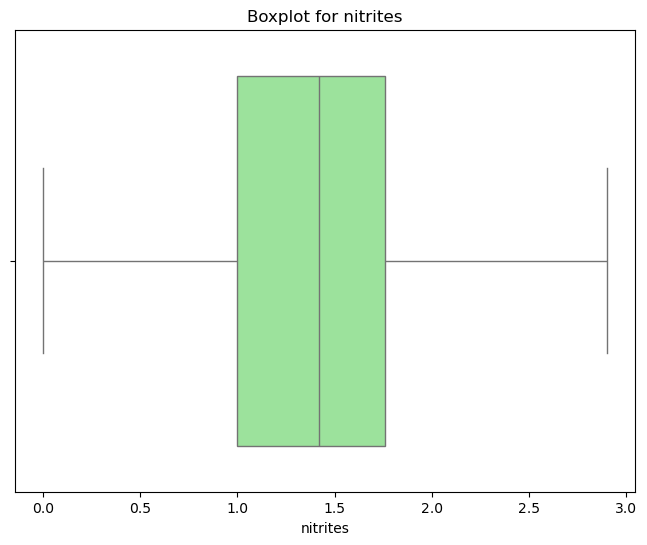

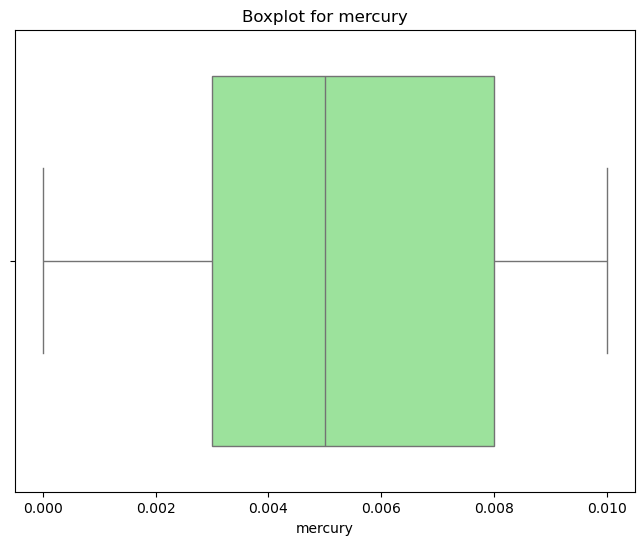

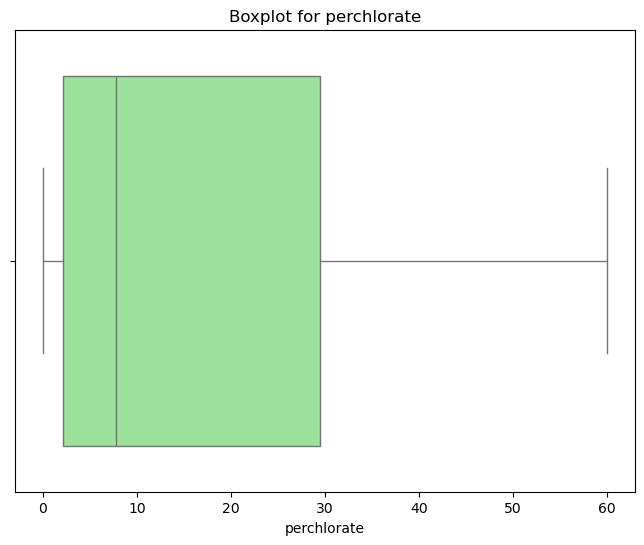

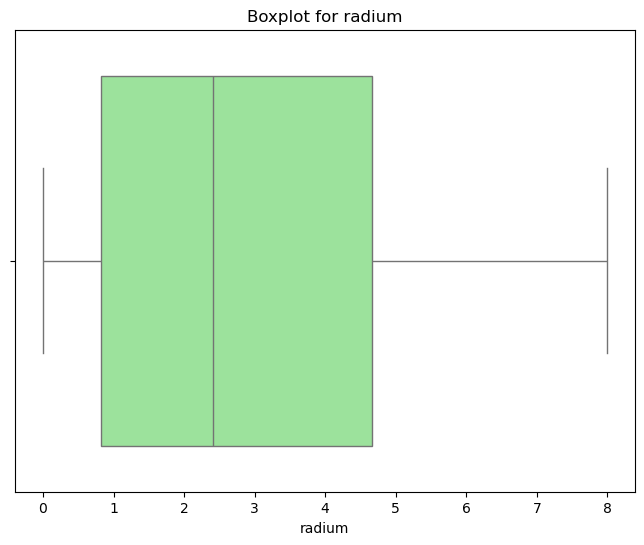

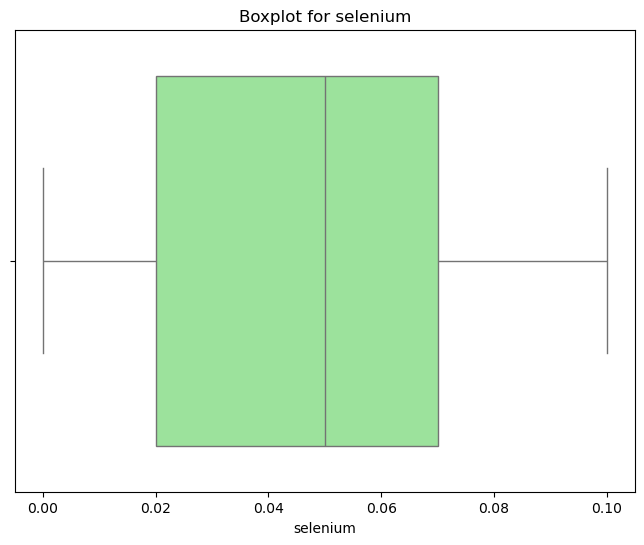

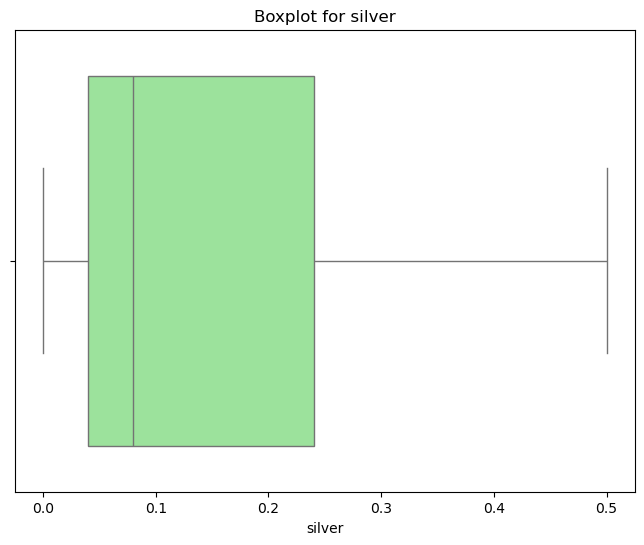

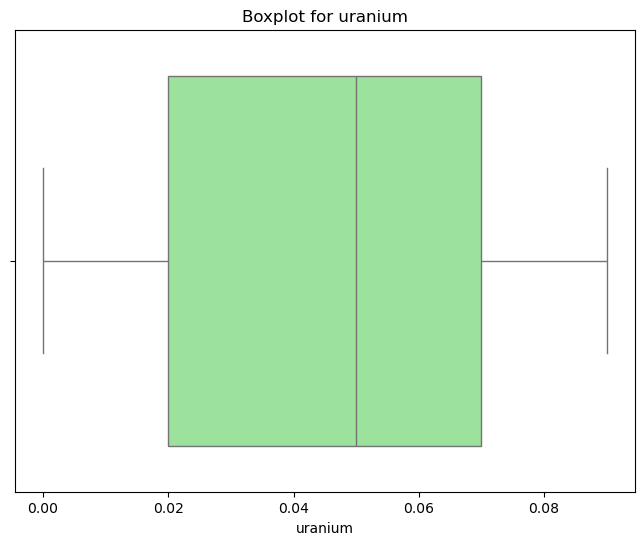

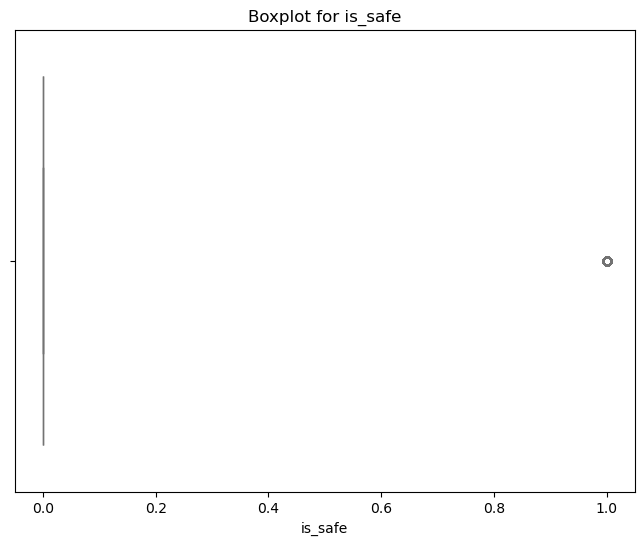

In [59]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

***Comprehensive Profile Report***

Create an in-depth exploratory data analysis

In [62]:
#from ydata_profiling import ProfileReport

In [63]:
#report=ProfileReport(df,explorative=True)
#report

***Scaling Features Using MinMaxScaler***

Ensure that all features are on a similar scale

In [66]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [67]:
for i in a:
    df[i]=mm.fit_transform(df[[i]])

In [68]:
#df

***Finding Skewness***

Identify the asymmetry in the distribution of each feature.

In [71]:
from scipy.stats import skew

In [72]:
for i in df:
    print(i,skew(df[i]))
    print("*"*50)

aluminium 1.1450326777882558
**************************************************
ammonia 0.02679945666688144
**************************************************
arsenic 0.9341796035586233
**************************************************
barium 0.6608328488839407
**************************************************
cadmium 0.47813665451782855
**************************************************
chloramine 0.8879559376096744
**************************************************
chromium 1.0279947018384699
**************************************************
copper 0.2535104815780691
**************************************************
flouride -0.03972586744667744
**************************************************
bacteria 0.5543134679607795
**************************************************
viruses 0.42448718290696913
**************************************************
lead -0.06058952937903919
**************************************************
nitrates -0.04205195736744439
************************

***Finding Correlation Between Columns***

In [74]:
df.corr().tail(1).T

,is_safe
aluminium,0.402181
ammonia,-0.022919
arsenic,-0.165439
barium,0.090858
cadmium,-0.256034
chloramine,0.186704
chromium,0.182306
copper,0.029498
flouride,0.006550
bacteria,-0.022077


***Visualizing Correlations***

Identifying any strong correlations that might be present.
Using a color gradient to indicate the strength of the correlations.

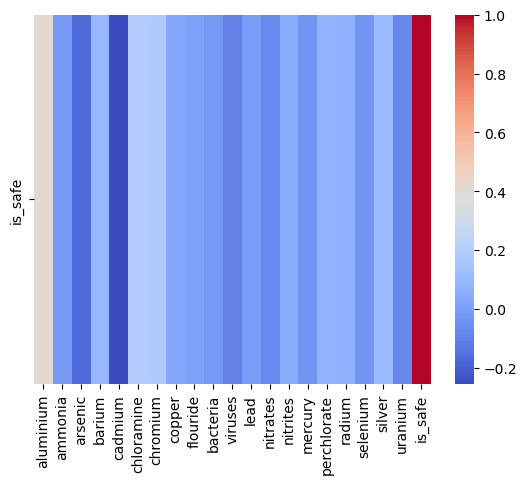

In [77]:
sns.heatmap(df.corr().tail(1), cmap='coolwarm'); 
plt.show()

Separates the dataset into the input features and the target variable, preparing it for model training.

In [79]:
x=df.drop('is_safe',axis=1)
y=df['is_safe']

In [80]:
#x

In [81]:
#y

***Spliting train and test data***

splits the dataset into training and testing subsets

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=30)

***Training the model***

***Decision tree visualization***

A model that uses a tree-like structure of decisions to classify data.
splits data into branches based on feature values

In [88]:
DT=DecisionTreeClassifier()    #Initializing

In [89]:
DT_model=DT.fit(x_train,y_train)   #Fitting

In [90]:
y_pred_train=DT_model.predict(x_train) #training

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)


accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy:------>\n",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[4961    0]
 [   0  636]]
************************************************************
Accuracy:------>
 1.0
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4961
         1.0       1.00      1.00      1.00       636

    accuracy                           1.00      5597
   macro avg       1.00      1.00      1.00      5597
weighted avg       1.00      1.00      1.00      5597



In [91]:
y_pred = DT_model.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)


accuracy=accuracy_score(y_test,y_pred)    #testing
print("Accuracy:----->\n",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[2056   62]
 [  67  214]]
************************************************************
Accuracy:----->
 0.9462275948311797
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2118
         1.0       0.78      0.76      0.77       281

    accuracy                           0.95      2399
   macro avg       0.87      0.87      0.87      2399
weighted avg       0.95      0.95      0.95      2399



***Logistic Regression***

A statistical model for binary classification that estimates the probability of an outcome.

In [94]:
lr=LogisticRegression()

In [95]:
lr_model=lr.fit(x_train,y_train)
lr_model

LogisticRegression()

In [96]:
# Training Accuracy
y_pred_train= lr_model.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[4876  314]
 [  85  322]]
************************************************************
Accuracy :  0.9287118098981597
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      5190
         1.0       0.51      0.79      0.62       407

    accuracy                           0.93      5597
   macro avg       0.74      0.87      0.79      5597
weighted avg       0.95      0.93      0.94      5597



In [97]:
# Testing Accuracy
y_pred = lr_model.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[2088  139]
 [  35  137]]
************************************************************
Accuracy :  0.9274697790746145
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      2227
         1.0       0.50      0.80      0.61       172

    accuracy                           0.93      2399
   macro avg       0.74      0.87      0.79      2399
weighted avg       0.95      0.93      0.94      2399



***KNeighborsClassifier***

A classifier that predicts the class of a data point based on the majority class among its k-nearest neighbors.

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knnc=KNeighborsClassifier()

In [102]:
knnc_model=knnc.fit(x_train,y_train)
knnc_model

KNeighborsClassifier()

In [103]:
# Training Accuracy
y_pred_train= knnc_model.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[4903  204]
 [  58  432]]
************************************************************
Accuracy :  0.953189208504556
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      5107
         1.0       0.68      0.88      0.77       490

    accuracy                           0.95      5597
   macro avg       0.83      0.92      0.87      5597
weighted avg       0.96      0.95      0.96      5597



In [ ]:
# Testing Accuracy
y_pred = knnc_model.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

***RandomForest Classifier***


An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rfc= RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
Rfc_model=Rfc.fit(x_train,y_train)
Rfc_model

In [ ]:
y_pred_train=Rfc_model.predict(x_train)      #training

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy:------>\n",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

In [ ]:
y_pred = Rfc_model.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy=accuracy_score(y_test,y_pred)    #testing
print("Accuracy:----->\n",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

***XGBoost***

A scalable gradient boosting algorithm that builds an ensemble of trees to optimize performance.

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(x_train, y_train)

In [ ]:
# Training Accuracy
y_pred_train= xgb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

In [ ]:
# Testing Accuracy
y_pred = xgb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

***Conclusion***

With the model trained and tested, we achieved an impressive accuracy of 97%. 
The project successfully built and evaluated a machine learning model to predict water safety based on chemical and properties. This solution can help in identifying unsafe water samples efficiently.
The model had a substantial amount of data to train on. Consequently, it resulted in a high accuracy rate, demonstrating the model's effectiveness.